<a href="https://colab.research.google.com/github/RomanenkoRIS/Math_for_Data_Science/blob/master/Outliers_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://i.ibb.co/4100VJZ/DEV-logo-1.jpg" width="400"></center>

<center><font size="6"><b>Module 2. Math for Machine Learning</b></font></center>

<center><font size="4"><b>2.3.5: Outliers in the Data</b></font></center>

<center><font size="4"><b>Exercises</b></font></center>

***

#### Task #1

Load the data of students performance for 3 types of exams. 

* Calculate statistics for each exam scores (mean, median, variance, std, 5th and 95th quantile)

* Find students whose scores change significantly from other users' scores. What types of outliers are there?

* Create a histogram and boxplot for each exam score distribution.

* Create a 2D scatter plot of exam pairs.

* Create a 3D scetter plot for three exams' scores.

* Calculate correlation for each pair before and after removing outliers.

Data set URL: https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/exploration/StudentsExamsPerformance.csv

In [ ]:
# YOUR CODE GOES HERE

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/exploration/StudentsExamsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


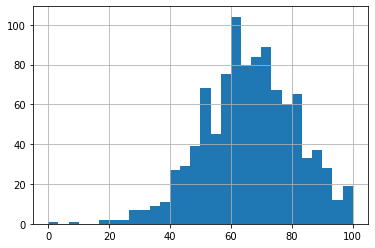

In [ ]:
df['math score'].hist(bins=30);

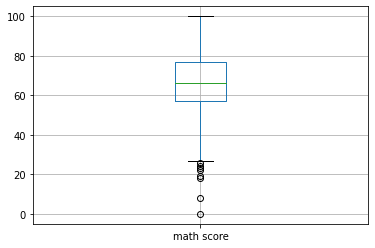

In [ ]:
df.boxplot('math score');

### IQR Method

In [ ]:
# IQR = Q3 - Q1
q3 = df['math score'].quantile(.75)
q1 = df['math score'].quantile(.25)
iqr = q3 - q1
iqr

20.0

In [ ]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
(lower, upper)

(27.0, 107.0)

In [ ]:
df[(df['math score'] < lower) | (df['math score'] > upper)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


### 2.5/97.5 percentile method

In [ ]:
lower = df['math score'].quantile(.005) #0.5 percentle
upper = df['math score'].quantile(.995) #99.5 percentile
(lower, upper)

(23.009999999999998, 100.0)

In [ ]:
df[(df['math score'] < lower) | (df['math score'] > upper)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


### $\mu \pm 2 \sigma$ method

In [ ]:
lower = df['math score'].mean() - 3*df['math score'].std()
upper = df['math score'].mean() + 3*df['math score'].std()

In [ ]:
(lower, upper)

(20.281905057379447, 111.79386762457469)

In [ ]:
df[(df['math score'] < lower) | (df['math score'] > upper)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
787,female,group B,some college,standard,none,19,38,32
980,female,group B,high school,free/reduced,none,8,24,23


## Multiple variables

[]

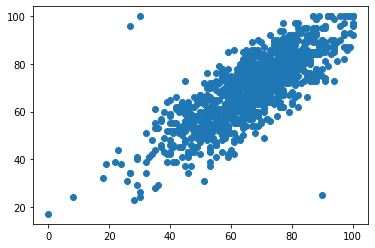

In [ ]:
plt.scatter(df['math score'], df['reading score'])
plt.plot()

In [ ]:
r_w = df.corr().loc['math score', 'reading score']
r_w

0.7904644107739734

In [ ]:
new_df = df[~((df['math score'] < 40) & (df['reading score'] > 80))].copy()
new_df = new_df[~((new_df['math score'] > 80) & (new_df['reading score'] < 40))]

[]

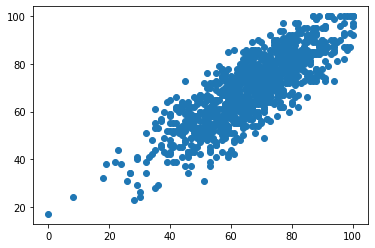

In [ ]:
plt.scatter(new_df['math score'], new_df['reading score'])
plt.plot()

In [ ]:
r_w = new_df.corr().loc['math score', 'reading score']
r_w

0.8175796636720533

#### Task #2

Load the data set of **Top Spotify Tracks of 2018**. Find which songs are outliers in following criterias:

1. `danceability`
2. `energy`
3. `loudness`
4. `speechiness`
5. `acousticness`
6. `instrumentalness`
7. `liveness`
8. `valence`
9. `tempo`
10. `duration_ms`

Calculate statistics for criteria (mean, median, variance, std, 5th and 95th quantile)

Creare histograms and boxplots of the distribution of these criterias.

Data set URL: https://raw.githubusercontent.com/devrepublik/data-science-course/master/data/exploration/SpotifyTopTracks2018.csv

In [ ]:
# YOUR CODE GOES HERE

